In [20]:
import sys
sys.path.append('/home/david/dials_dev/modules/dxtbx/src')
sys.path.append('/home/david/dials_dev/build/lib')
sys.path.append('/home/david/dials_dev/modules')
from cctbx import factor_kev_angstrom
from dials.array_family import flex
import dxtbx
#from dxtbx.model.experiment_list import ExperimentListFactory
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import Modules_Multipanel as MOD


mpl.rc_file('matplotlibrc.txt')

In [21]:
image_file_name = '/home/david/Documents/Background/Data/converted.cbf'
image = dxtbx.load(image_file_name)
beam = image.get_beam()
wavelength = beam.get_wavelength()
data = image.get_raw_data()
detector = image.get_detector()
pixel_size = detector[0].get_pixel_size()[0]
kapton_absorption_length = MOD.get_absorption_correction()(wavelength)

In [22]:
I, s, s_norm, mask, theta2, phi, polarization, integrated_image =\
        MOD.GetImage(data, detector, 1)
phi_int = np.linspace(0, 2*np.pi, 64)
theta2_indices = np.logical_and(
    theta2 >= 10 * np.pi/180,
    theta2 <= 40 * np.pi/180
    )
indices = np.logical_and(
    theta2_indices,
    np.invert(mask)
    )
counts = np.histogram(
    phi[indices],
    bins=phi_int
    )
bin_centers = (phi_int[1:] + phi_int[:-1])/2


/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]


/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]
/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]
/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]
/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]
/home/david/Documents/Background/analytical/sandbox/Modules_Multipanel.py:421: RuntimeWarning: invalid value encountered in true_divide
  integrated = integration_sum[0] / integration_counts[0]


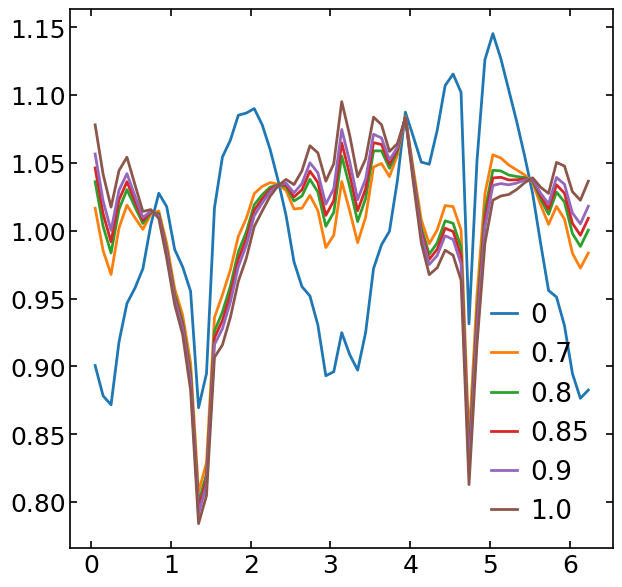

In [23]:
p_frac = [0, 0.7, 0.8, 0.85, 0.9, 1.0]
integrated = np.zeros((len(p_frac), bin_centers.size))
fig, axes = plt.subplots(1, 1)
for index, p in enumerate(p_frac):
    I, s, s_norm, mask, theta2, phi, polarization, integrated_image =\
        MOD.GetImage(data, detector, p)
    normalized_image = I / (polarization * integrated_image)
    normalized_image[mask] = -1
    phi_sum = np.histogram(
        phi[indices],
        bins=phi_int,
        weights=normalized_image[indices]
        )
    integrated[index, :] = phi_sum[0] / counts[0]

    axes.plot(bin_centers, integrated[index, :], label=str(p))
axes.legend()

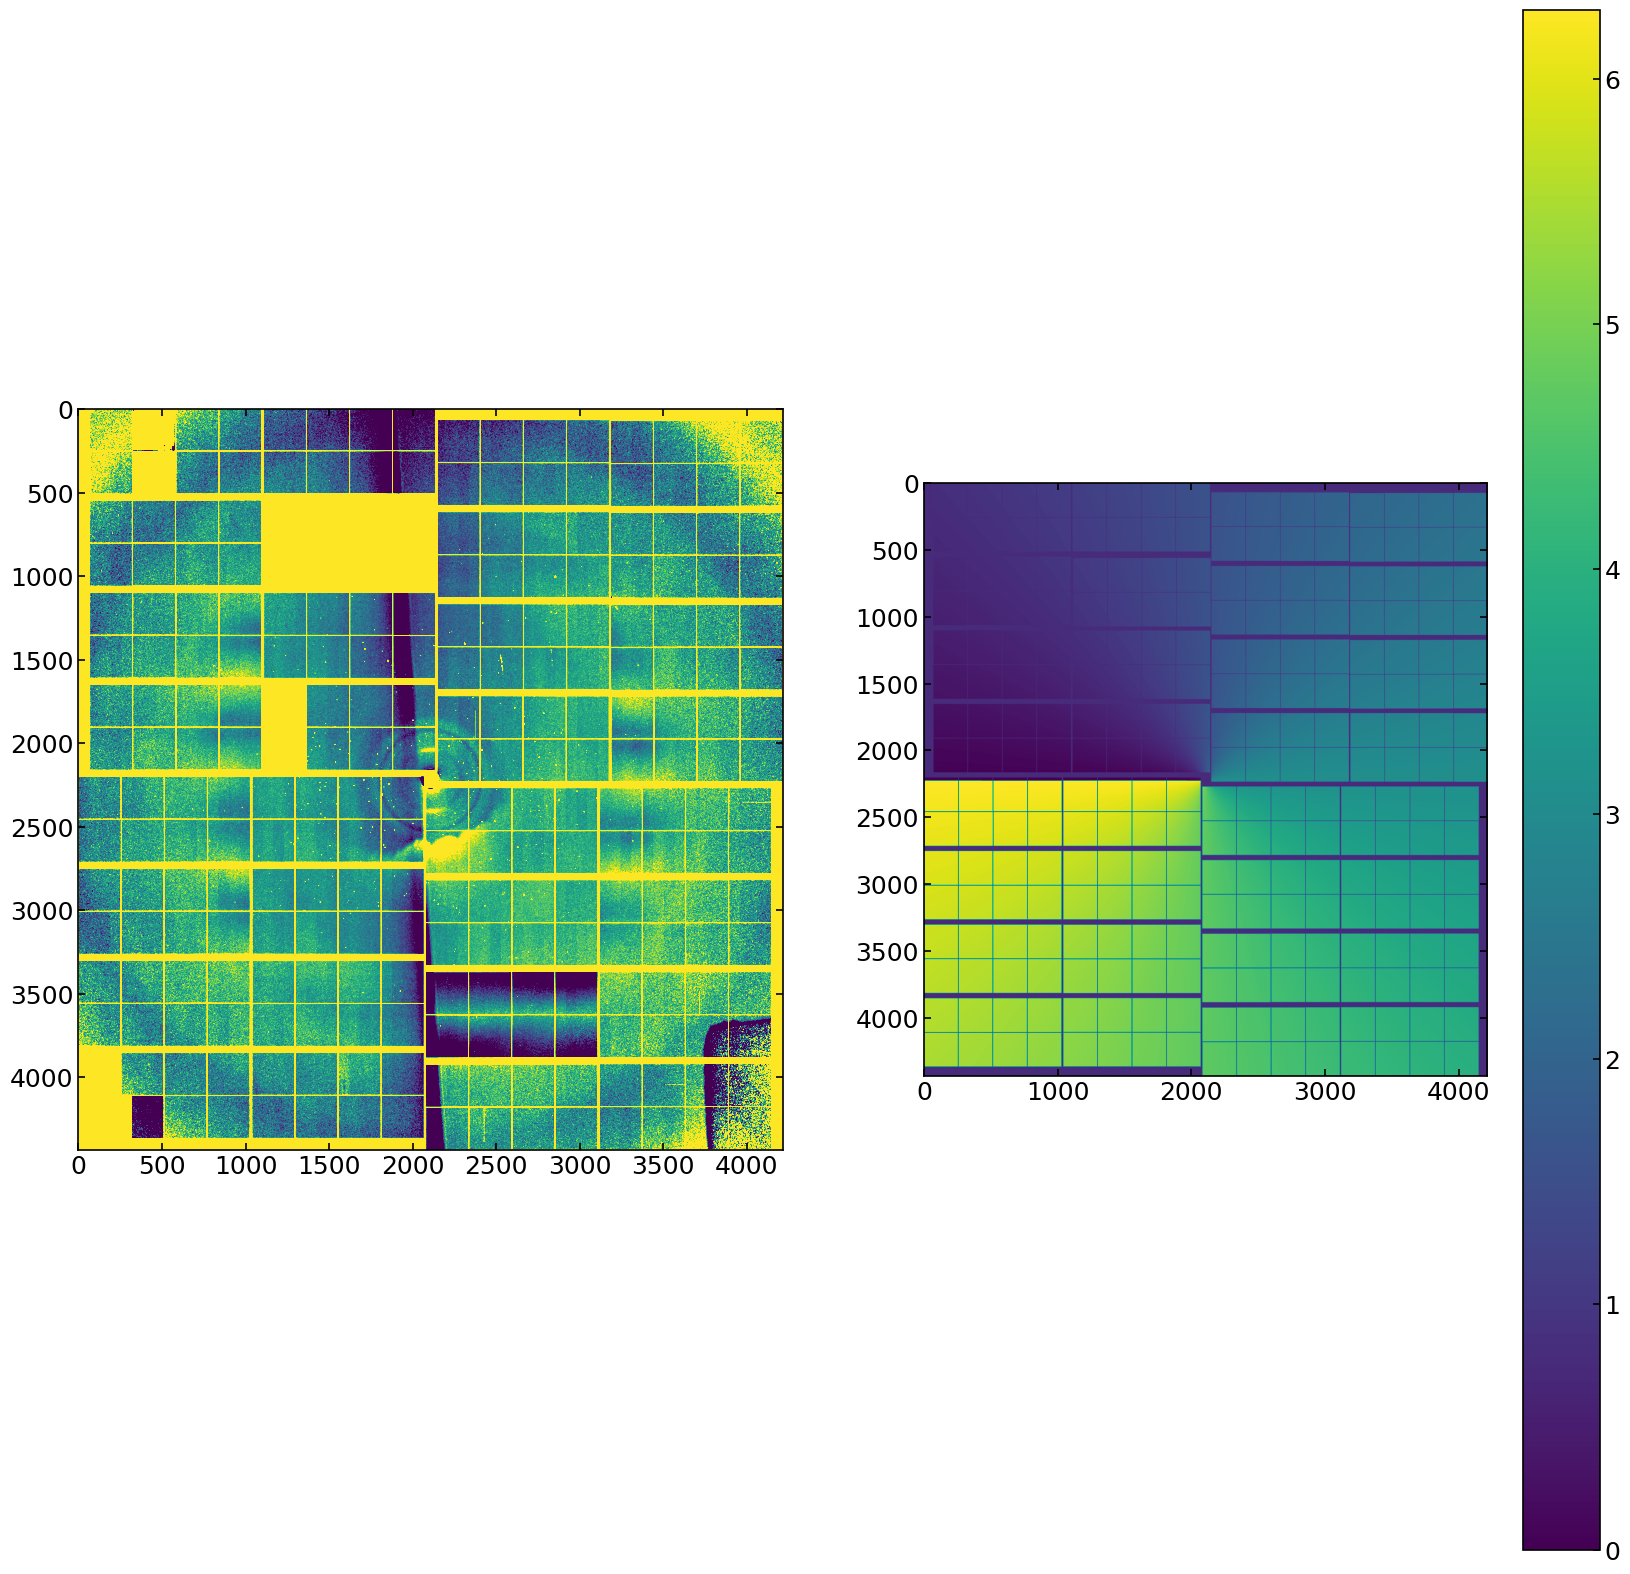

In [24]:
normalized_image[mask] =2
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(normalized_image, vmin=0.8, vmax=1.2)
im1 = axes[1].imshow(phi, vmin=0, vmax=2*np.pi)
fig.colorbar(im1, ax=axes[1])
plt.show()